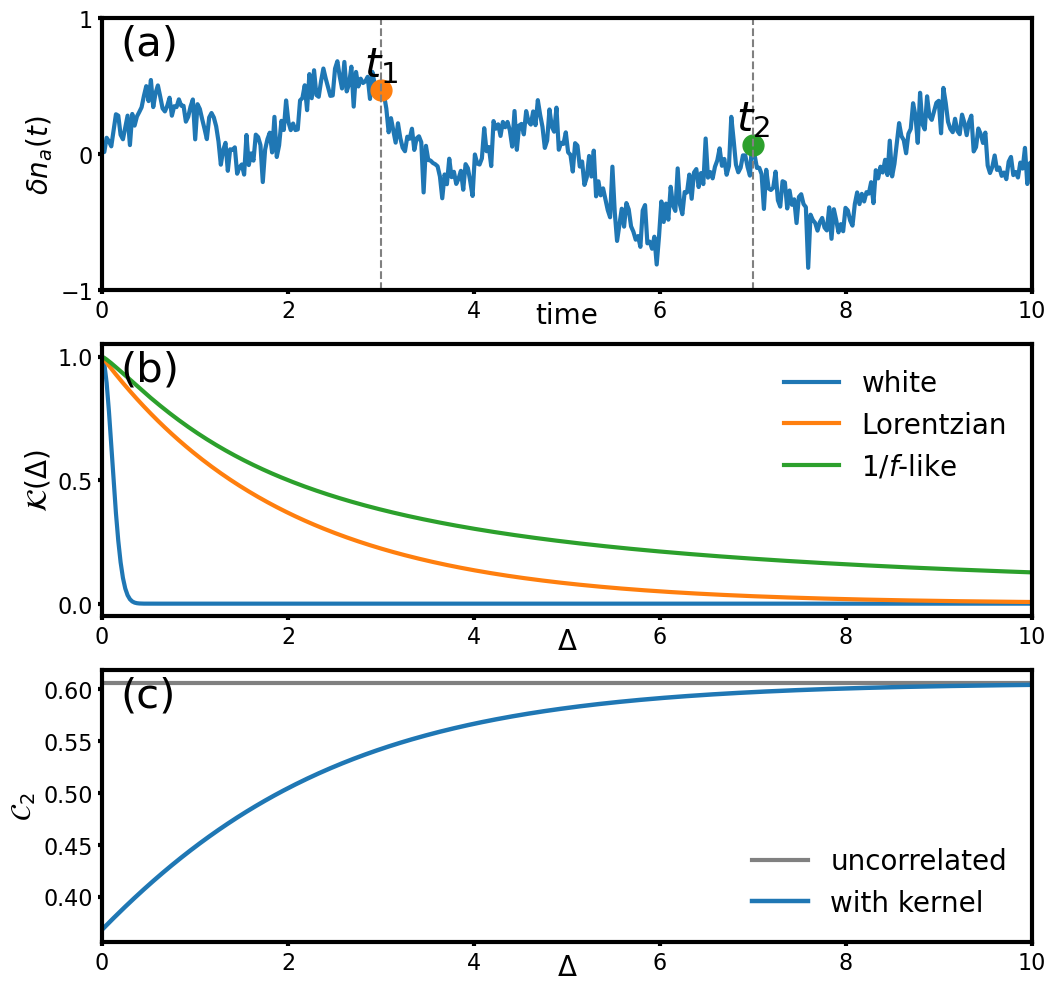

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# Style settings for PRL-like aesthetics
# -------------------------------------------------------------------
plt.rcParams['figure.figsize'] = (8.0, 3.2)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 0.6
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5

# -------------------------------------------------------------------
# Panel (a): Thermal fluctuations + sampling at t1, t2
# -------------------------------------------------------------------
t = np.linspace(0, 10, 400)
rng = np.random.default_rng(0)
n_fluc = 0.3*np.sin(0.7*t) + 0.3*np.sin(3*t) + 0.1*rng.normal(size=len(t))

t1, t2 = 3.0, 7.0
n1 = np.interp(t1, t, n_fluc)
n2 = np.interp(t2, t, n_fluc)

# -------------------------------------------------------------------
# Panel (b): Correlation kernels K(Δ)
# -------------------------------------------------------------------
Delta = np.linspace(0, 10, 400)

# White noise: delta-correlated (show as sharp peak + nearly zero tail)
K_white = np.exp(-((Delta)/0.15)**2)

# Lorentzian noise: exponential decay
tau_c = 2.0
K_lor = np.exp(-Delta/tau_c)

# 1/f-like heavy-tailed: slow power-law decay
K_1f = 1.0 / (1.0 + (Delta/2.0)**1.2)

# -------------------------------------------------------------------
# Panel (c): Two-tooth coherence C2
# -------------------------------------------------------------------
lam = 0.5
tau1, tau2 = 1.0, 1.0
var_n = 1.0

C1 = np.exp(-lam**2 * (tau1**2 + tau2**2) * var_n) * np.ones_like(Delta)
C_corr = np.exp(-lam**2*(tau1**2 + tau2**2)*var_n - 2*lam**2*tau1*tau2*K_lor)
# C_corr = np.exp(-2*lam**2*tau1*tau2*K_1f) * np.ones_like(Delta)
# C_tot = C1*C_corr

# -------------------------------------------------------------------
# Plot layout
# -------------------------------------------------------------------
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
# gridspec_kw={'wspace':0.35})

# ===================================================================
#  Panel (a)
# ===================================================================
ax = axs[0]
ax.plot(t, n_fluc, lw=3.0)
ax.plot([t1], [n1], 'o', ms=15)
ax.plot([t2], [n2], 'o', ms=15)
ax.axvline(t1, color='gray', lw=1.5, ls='--')
ax.axvline(t2, color='gray', lw=1.5, ls='--')

ax.text(t1, n1+0.1, r'$t_1$', ha='center', fontsize=30)
ax.text(t2, n2+0.1, r'$t_2$', ha='center', fontsize=30)

# ax.set_title('(a) Sampling of $n_a(t)$', fontsize=10)
ax.set_xlabel('time', fontsize=20)
ax.xaxis.set_label_coords(0.5, -0.04)
ax.set_ylabel(r'$\delta n_a(t)$', fontsize=20)
# ax.yaxis.set_label_coords(-0.08, 0.5)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)
ax.set_yticks([-1, 0.0, 1])

# ===================================================================
#  Panel (b)
# ===================================================================
ax = axs[1]
ax.plot(Delta, K_white, lw=3.0, label='white')
ax.plot(Delta, K_lor, lw=3.0, label='Lorentzian')
ax.plot(Delta, K_1f, lw=3.0, label=r'$1/f$-like')

# ax.set_title('(b) Population kernel $K(\Delta)$', fontsize=10)
ax.set_xlabel('$\\Delta$', fontsize=20)
ax.xaxis.set_label_coords(0.5, -0.04)
ax.set_ylabel('$\\mathcal{K}$($\\Delta$)', fontsize=20)
ax.set_xlim(0, 10)
ax.set_ylim(-0.05, 1.05)
ax.set_yticks([0.0, 0.5, 1.0])
ax.legend(frameon=False, fontsize=20)

# ===================================================================
#  Panel (c)
# ===================================================================
ax = axs[2]
ax.plot(Delta, C1, lw=3, color='gray', label='uncorrelated')
ax.plot(Delta, C_corr, lw=3.2, label='with kernel')
# ax.plot(Delta, C_tot, lw=3.2, label='total')

# ax.set_title('(c) Two-tooth coherence $C_2(\Delta)$', fontsize=10)
ax.set_xlabel('$\\Delta$', fontsize=20)
ax.xaxis.set_label_coords(0.5, -0.04)
ax.set_ylabel('$\\mathcal{C}_2$', fontsize=20)
ax.set_xlim(0, 10)
# ax.set_ylim(0.0, 1.1)
# ax.set_yticks([0.0, 0.5, 1.0])
ax.legend(frameon=False, fontsize=20)

labels = ['(a)', '(b)', '(c)'] 
line_width = 3.0  # Desired line thickness (adjust as needed)
for i, ax in enumerate(fig.get_axes()): # Iterate through all Axes objects in the figure
    for spine in ax.spines.values():
        spine.set_linewidth(line_width)
    ax.tick_params(width=line_width)
    ax.text(0.02, 0.98, labels[i], transform=ax.transAxes,
            fontsize=30, fontweight='normal', va='top', ha='left')
    
    ax.tick_params(axis='both',  direction='out', labelsize=16, length=3.0)
    for tick_label in ax.get_xticklabels():
        tick_label.set_fontweight('normal')
    for tick_label in ax.get_yticklabels():
        tick_label.set_fontweight('normal')
# -------------------------------------------------------------------
plt.show()


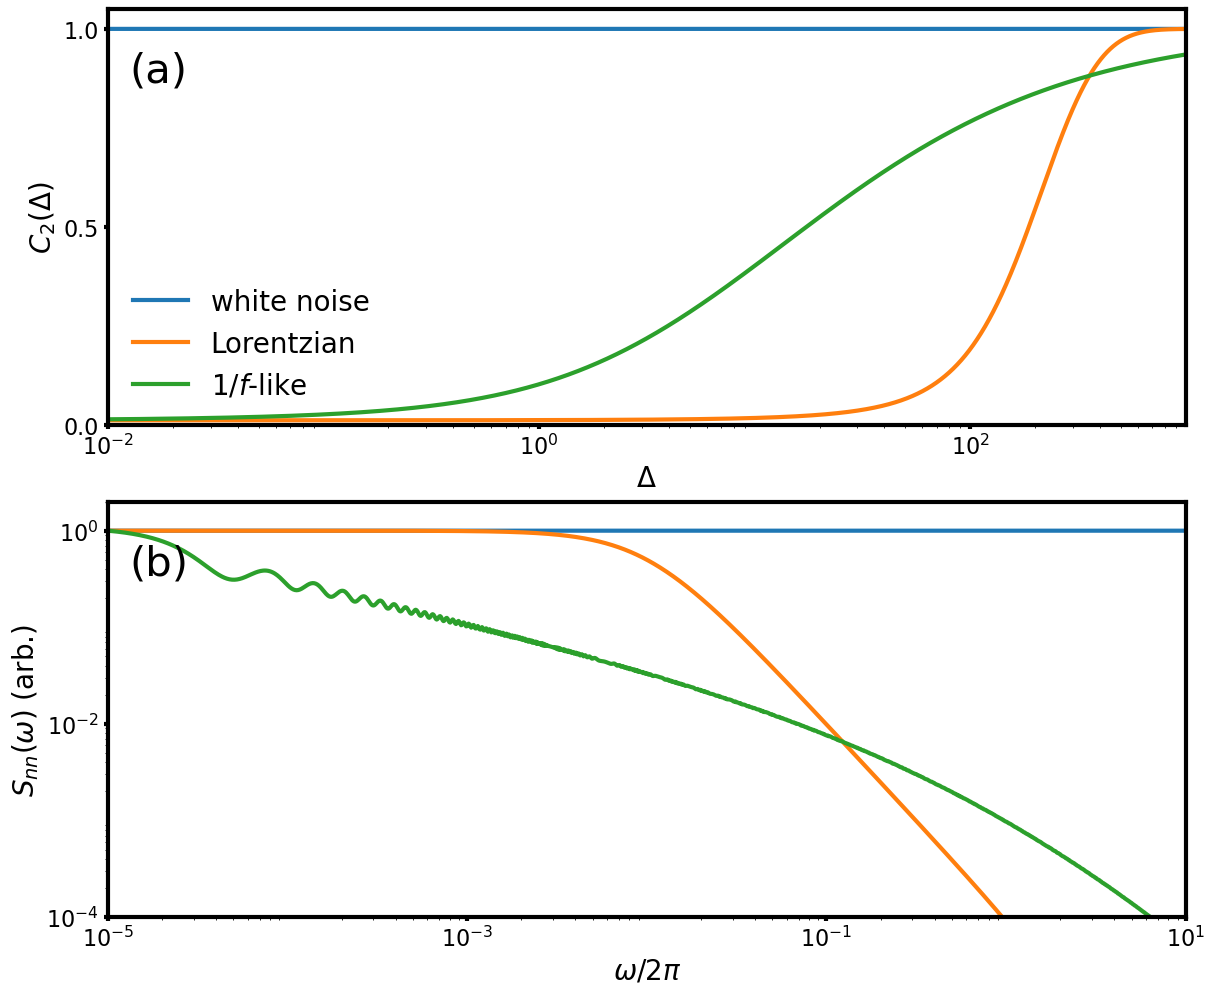

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# PRL-like plotting style
# ------------------------------------------------------------
# plt.rcParams['figure.figsize'] = (3.4, 2.6)   # single-column
# plt.rcParams['font.size'] = 9
# plt.rcParams['axes.linewidth'] = 0.6
# plt.rcParams['xtick.major.width'] = 0.5
# plt.rcParams['ytick.major.width'] = 0.5

# ------------------------------------------------------------
# Parameters for coherence (dimensionless units)
# ------------------------------------------------------------
lam = 0.5        # effective cross-Kerr rate
tau1 = 3.0        # interaction times
tau2 = 3.0
var_n = 1.0       # population variance

base = lam**2 * (tau1**2 + tau2**2) * var_n          # single-tooth part
corr_scale = 2 * lam**2 * tau1 * tau2 * var_n        # correlated part

Delta = np.geomspace(0.001, 100000, 4000000)   # delay axis
# Delta = np.linspace(0.01, 10000, 40000)   # delay axis

# ------------------------------------------------------------
# Define three example kernels K(Δ)
# ------------------------------------------------------------
# White noise: nearly delta-correlated -> super-fast decay
sigma_w = 0.001
K_white = np.exp(-(Delta / sigma_w)**2)

# Lorentzian noise: exponential correlation decay
tau_c = 100
K_lor = np.exp(-Delta / tau_c)

# 1/f-like noise: slow, heavy-tailed correlations (phenomenological)
tau_f = 1e0
gamma = 0.6  # <1 for heavy tail
K_1f = 1.0 / (1.0 + (Delta / tau_f)**gamma)

# Normalize kernels so K(0) = Var[n] = 1 (we absorb Var into base/corr_scale)
K_white /= K_white[0]
K_lor   /= K_lor[0]
K_1f    /= K_1f[0]
K_mix = (K_lor + K_1f)/2

# ------------------------------------------------------------
# Coherence C2(Δ) using Eq. (two-tooth coherence)
# C2(Δ) = exp[- base - corr_scale * K(Δ)]
# (Var[n] absorbed into base and corr_scale.)
# ------------------------------------------------------------
C2_white = np.exp(-(base + corr_scale * K_white))
C2_lor   = np.exp(-(base + corr_scale * K_lor))
C2_1f    = np.exp(-(base + corr_scale * K_1f))
C2_mix    = np.exp(-(base + corr_scale * K_mix))

# ------------------------------------------------------------
# Normalize by asymptotic value C2(Δ -> ∞) so max visibility = 1
# ------------------------------------------------------------
C2_inf_white = C2_white[-1]
C2_inf_lor   = C2_lor[-1]
C2_inf_1f    = C2_1f[-1]
C2_inf_mix    = C2_mix[-1]

C2_white_norm = C2_white / C2_inf_white
C2_lor_norm   = C2_lor   / C2_inf_lor
C2_1f_norm    = C2_1f    / C2_inf_1f
C2_mix_norm    = C2_mix    / C2_inf_mix

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

ax[0].semilogx(Delta, C2_white_norm, label='white noise', lw=3)
ax[0].semilogx(Delta, C2_lor_norm,   label='Lorentzian', lw=3)
ax[0].semilogx(Delta, C2_1f_norm,    label=r'$1/f$-like', lw=3)
# ax[0].semilogx(Delta, C2_mix_norm,   label=r'$1/f$+Lorentzian', linestyle='--', lw=2)

ax[0].set_xlabel(r'$\Delta$', fontsize=20)
ax[0].set_ylabel(r'$C_2(\Delta)$', fontsize=20)
ax[0].set_xlim(0.01, 1000)
ax[0].set_xticks([0.01, 1, 100])
ax[0].set_ylim(0.0, 1.05)   # adjust as you like; all ≤ 1
ax[0].set_yticks([0.0, 0.5, 1.0])
ax[0].legend(frameon=False, fontsize=20)

def reconstruct_kernel(C2_raw, base, corr_scale):
    return (-np.log(C2_raw) - base) / corr_scale

K_white_rec = reconstruct_kernel(C2_white, base, corr_scale)
K_lor_rec   = reconstruct_kernel(C2_lor,   base, corr_scale)
K_1f_rec    = reconstruct_kernel(C2_1f,    base, corr_scale)
# K_mix_rec    = reconstruct_kernel(C2_mix,    base, corr_scale)

omega = np.logspace(-5, 2, 1500)   # frequency axis
def spectrum_from_kernel(K, Delta, omega):
    S = np.zeros_like(omega)
    for i, w in enumerate(omega):
        S[i] = 2 * np.trapz(K * np.cos(w * Delta), Delta)
    return S

S_white_rec = spectrum_from_kernel(K_white_rec, Delta, omega)
S_lor_rec   = spectrum_from_kernel(K_lor_rec,   Delta, omega)
S_1f_rec    = spectrum_from_kernel(K_1f_rec,    Delta, omega)
# S_mix_rec    = spectrum_from_kernel(K_mix_rec,    Delta, omega)

ax[1].loglog(omega, S_white_rec/np.max(S_white_rec), label="white (rec.)", lw=3)
ax[1].loglog(omega, S_lor_rec/np.max(S_lor_rec),     label="Lorentzian (rec.)", lw=3)
ax[1].loglog(omega, S_1f_rec/np.max(S_1f_rec),       label="1/f-like (rec.)", lw=3)
# ax[1].loglog(omega, S_mix_rec/np.max(S_mix_rec), linestyle='--', lw=2)

ax[1].set_xlim(1e-5, 1e1)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xticks([1e-5, 1e-3, 1e-1, 1e1])
ax[1].set_yticks([1e-4, 1e-2, 1e0])
ax[1].set_xlabel(r'$\omega / 2\pi$', fontsize=20)
ax[1].set_ylabel(r'$S_{nn}(\omega)$ (arb.)', fontsize=20)
# ax[1].legend(frameon=False, fontsize=20)


plt.tight_layout()
labels = ['(a)', '(b)'] 
line_width = 3.0  # Desired line thickness (adjust as needed)
for i, ax in enumerate(fig.get_axes()): # Iterate through all Axes objects in the figure
    for spine in ax.spines.values():
        spine.set_linewidth(line_width)
    ax.tick_params(width=line_width)
    ax.text(0.02, 0.90, labels[i], transform=ax.transAxes,
            fontsize=30, fontweight='normal', va='top', ha='left')
    
    ax.tick_params(axis='both',  direction='out', labelsize=16, length=3.0)
    for tick_label in ax.get_xticklabels():
        tick_label.set_fontweight('normal')
    for tick_label in ax.get_yticklabels():
        tick_label.set_fontweight('normal')
plt.show()


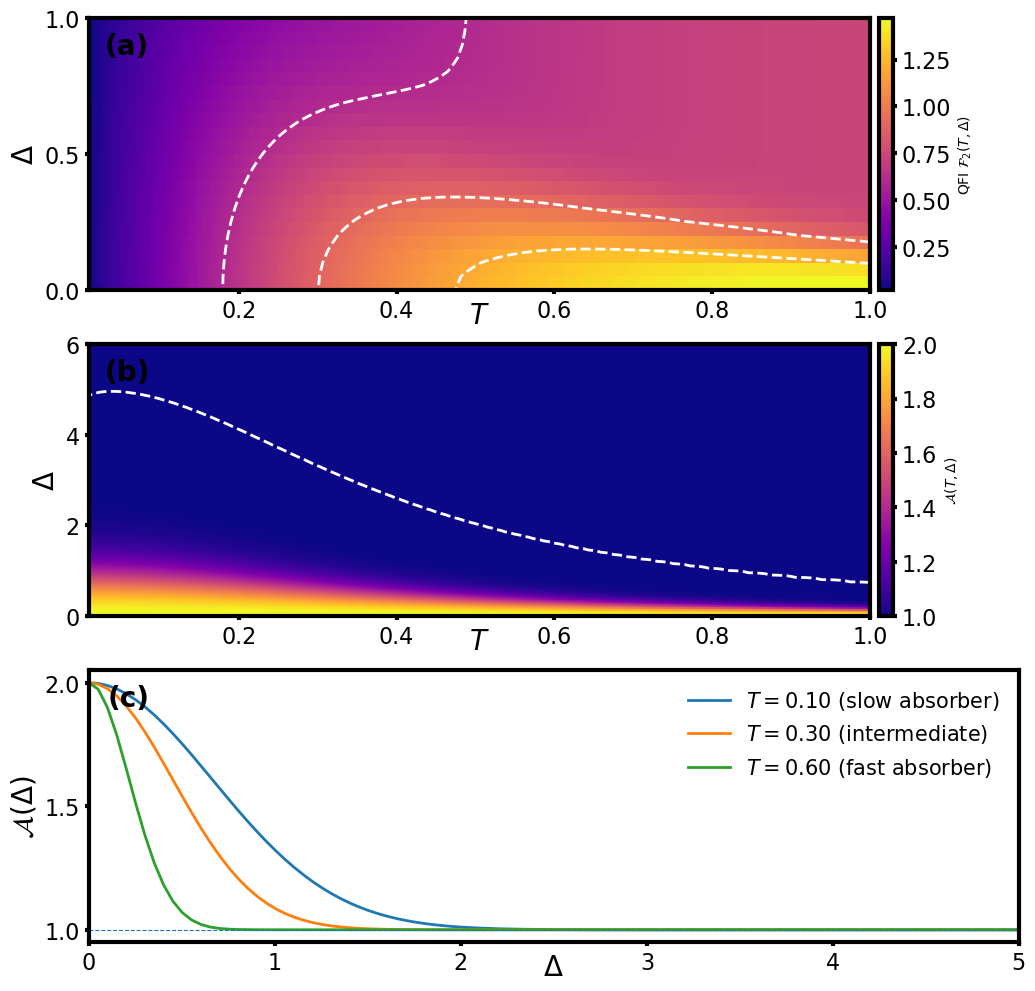

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T_min, T_max = 0.01, 1.0     # dimensionless temperature range
Delta_min, Delta_max = 0.0, 10.0  # dimensionless delay range

nT = 200
nD = 200

T = np.linspace(T_min, T_max, nT)
Delta = np.linspace(Delta_min, Delta_max, nD)

TT, DD = np.meshgrid(T, Delta, indexing='xy')

F1 = TT * np.exp(-TT)  # arbitrary but smooth, non-zero in (0,1)

tau0 = 1.0
T_ref = 0.4
tau_c = tau0 / (1.0 + (TT / T_ref)**2)

A0 = 1.0  # sets the maximum memory enhancement

F2 = 2.0 * F1 * (1.0 + A0 * np.exp(-(DD / tau_c)**2))

eps = 1e-12
A = F2 / (2.0 * F1 + eps)

fig, axes = plt.subplots(3, 1, figsize=(12, 12))
ax_a, ax_b, ax_c = axes

im0 = ax_a.imshow(
    F2,
    extent=[T_min, T_max, Delta_min, Delta_max],
    origin='lower',
    aspect='auto',
    cmap='plasma'
)

cbar0 = fig.colorbar(im0, ax=ax_a, pad=0.01)
cbar0.set_label(r'QFI $\mathcal{F}_2(T,\Delta)$')
ax_a.set_ylim(0, 1)
ax_a.set_yticks([0, 0.5, 1])
ax_a.set_xlabel(r'$T$', fontsize=20)
ax_a.xaxis.set_label_coords(0.5, -0.04)
ax_a.set_ylabel(r'$\Delta$', fontsize=20)
ax_a.text(0.02, 0.95, '(a)', transform=ax_a.transAxes,
          fontsize=20, fontweight='bold', va='top')

levels = np.linspace(F2.min(), F2.max(), 6)[-4:]
ax_a.contour(T, Delta, F2, levels=levels, linestyles='--', colors='w', linewidths=2.0)

im1 = ax_b.imshow(
    A,
    extent=[T_min, T_max, Delta_min, Delta_max],
    origin='lower',
    aspect='auto',
    cmap='plasma'
)

cbar1 = fig.colorbar(im1, ax=ax_b, pad=0.01)
cbar1.set_label(r'$\mathcal{A}(T,\Delta)$')
ax_b.set_ylim(0, 6)
ax_b.set_yticks([0, 2, 4, 6])
ax_b.set_xlabel(r'$T$', fontsize=20)
ax_b.xaxis.set_label_coords(0.5, -0.04)
ax_b.set_ylabel(r'$\Delta$', fontsize=20)
ax_b.text(0.02, 0.95, '(b)', transform=ax_b.transAxes,
          fontsize=20, fontweight='bold', va='top')
ax_b.contour(T, Delta, A, levels=[1.0], linestyles='--', colors='w', linewidths=2.0)

Delta_line = Delta

T_cuts = [0.1, 0.3, 0.6]  # example temperatures
labels = [
    r'$T={:.2f}$ (slow absorber)'.format(T_cuts[0]),
    r'$T={:.2f}$ (intermediate)'.format(T_cuts[1]),
    r'$T={:.2f}$ (fast absorber)'.format(T_cuts[2]),
]

for T0, lab in zip(T_cuts, labels):
    # recompute tau_c and A(Δ) for a single T0
    tau_c0 = tau0 / (1.0 + (T0 / T_ref)**2)
    A_line = 1.0 + A0 * np.exp(-(Delta_line / tau_c0)**2)
    ax_c.plot(Delta_line, A_line, label=lab, lw=2.0)

ax_c.set_xlim(0, 5)
ax_c.set_yticks([1.0, 1.5, 2.0])
ax_c.set_xlabel(r'$\Delta$', fontsize=20)
ax_c.xaxis.set_label_coords(0.5, -0.04)
ax_c.set_ylabel(r'$\mathcal{A}(\Delta)$', fontsize=20)
ax_c.text(0.02, 0.95, '(c)', transform=ax_c.transAxes,
          fontsize=20, fontweight='bold', va='top')
ax_c.axhline(1.0, linestyle='--', linewidth=0.8)
# ax_c.set_title('Line cuts of memory advantage')
ax_c.legend(frameon=False, fontsize=15, loc='upper right')
labels = ['(a)', '(b)'] 
line_width = 3.0  # Desired line thickness (adjust as needed)
for i, ax in enumerate(fig.get_axes()): # Iterate through all Axes objects in the figure
    for spine in ax.spines.values():
        spine.set_linewidth(line_width)
    ax.tick_params(width=line_width)
#     ax.text(0.02, 0.98, labels[i], transform=ax.transAxes,
#             fontsize=30, fontweight='normal', va='top', ha='left')
    
    ax.tick_params(axis='both',  direction='out', labelsize=16, length=3.0)
    for tick_label in ax.get_xticklabels():
        tick_label.set_fontweight('normal')
    for tick_label in ax.get_yticklabels():
        tick_label.set_fontweight('normal')

plt.show()


C:\Users\sjzhu\AppData\Local\Temp\ipykernel_14184\1540288889.py:148: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax_c.set_xlim(0.0, 40.0)


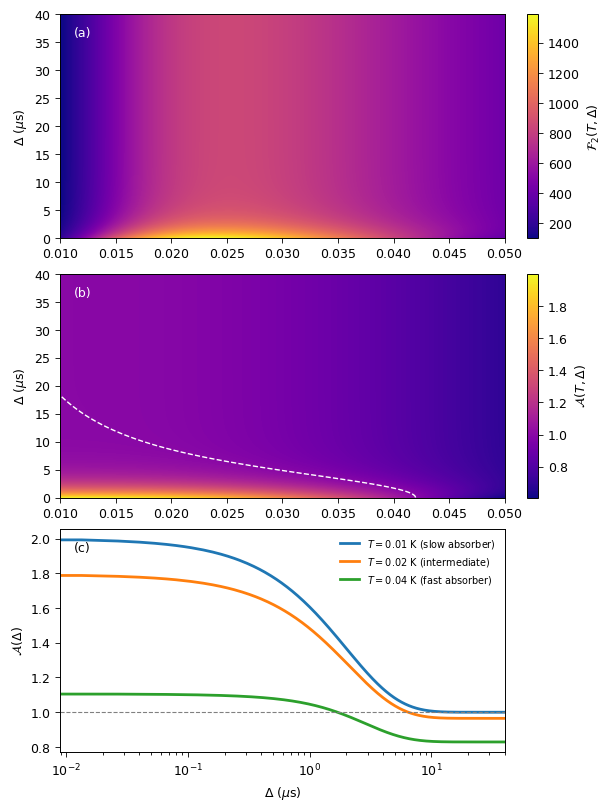

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Physical constants
# ------------------------------------------------------------
kB   = 1.380649e-23      # Boltzmann [J/K]
hbar = 1.054571817e-34   # reduced Planck [J s]
pi   = np.pi

# ------------------------------------------------------------
# Physical parameters
# ------------------------------------------------------------
omega_a = 2 * pi * 2e9      # absorber frequency (rad/s), 1 GHz
lam_hz  = 50e3                # nominal cross-Kerr in Hz
lam_eff_hz = 10e3             # effective cross-Kerr used in plot (adjustable)
lam = 2 * pi * lam_eff_hz     # effective cross-Kerr (rad/s)

tau  = 20e-6                  # interaction duration for each tooth [s]
tau_c = 2e-6                 # correlation time of Lorentzian noise [s]

# Temperature range [K]
T_min, T_max, nT = 0.01, 0.05, 500
# Delay range [s]
Delta_min, Delta_max, nD = 0, 40e-6, 3000

T = np.linspace(T_min, T_max, nT)               # K
Delta = np.linspace(Delta_min, Delta_max, nD)   # s
TT, DD = np.meshgrid(T, Delta, indexing="ij")

# ------------------------------------------------------------
# Thermal occupation and variance of absorber mode
#   nbar(T) = 1 / (exp(hbar ω / kB T) - 1)
#   Var[n]  = nbar (1 + nbar)
# ------------------------------------------------------------
x = hbar * omega_a / (kB * TT)
nbar = 1.0 / (np.exp(x) - 1.0)
Var_n = nbar * (1.0 + nbar)

# ------------------------------------------------------------
# Lorentzian noise → exponential memory kernel in time domain:
#   S_nn(ω;T) ∝ Var_n(T) τ_c / [1 + (ω τ_c)^2]
#   K(Δ;T)    = Var_n(T) exp(-|Δ|/τ_c)
# ------------------------------------------------------------
K = Var_n * np.exp(-DD / tau_c)

# ------------------------------------------------------------
# Dephasing rates
#   Γ_φ1(T)          = λ² τ² Var_n(T)
#   Γ_φ2(T,Δ)        = λ² [ 2 τ² Var_n(T) + 2 τ² K(Δ;T) ]
# ------------------------------------------------------------
lam2 = lam**2
Gamma1 = lam2 * tau**2 * Var_n
Gamma2 = lam2 * (2.0 * tau**2 * Var_n + 2.0 * tau**2 * K)

# ------------------------------------------------------------
# Coherences and temperature derivatives
#   C = exp(-Γ)
#   F(T) = (∂_T C)^2 / (1 - C^2)
# ------------------------------------------------------------
C1 = np.exp(-Gamma1)   # shape (nT, nD) by broadcasting
C2 = np.exp(-Gamma2)

# derivatives along T axis
dC1_dT = np.gradient(C1, T, axis=0)
dC2_dT = np.gradient(C2, T, axis=0)

eps = 1e-14
C1_clip = np.clip(C1, -1 + eps, 1 - eps)
C2_clip = np.clip(C2, -1 + eps, 1 - eps)

F1 = (dC1_dT**2) / (1.0 - C1_clip**2 + eps)
F2 = (dC2_dT**2) / (1.0 - C2_clip**2 + eps)

# total single-tooth QFI for two identical interactions
F1_total = 2.0 * F1

# Memory advantage
A = F2 / (F1_total + eps)

# ------------------------------------------------------------
# Plotting
# ------------------------------------------------------------
plt.rcParams["figure.figsize"] = (3.4, 5.0)
plt.rcParams["font.size"] = 9
plt.rcParams["axes.linewidth"] = 0.7
plt.rcParams["xtick.major.width"] = 0.6
plt.rcParams["ytick.major.width"] = 0.6

fig, axes = plt.subplots(3, 1, figsize=(6, 8), constrained_layout=True)
ax_a, ax_b, ax_c = axes

# Convenience: convert Δ-axis to microseconds for plotting
Delta_us = Delta * 1e6
extent_TD = [T_min, T_max, Delta_min * 1e6, Delta_max * 1e6]

# (a) Two-tooth QFI F2(T, Δ)
im0 = ax_a.imshow(
    F2.T,
    origin="lower",
    extent=extent_TD,
    aspect="auto",
    cmap='plasma',
)
ax_a.set_ylabel(r'$\Delta~(\mu\mathrm{s})$')
ax_a.text(0.03, 0.90, r'(a)', transform=ax_a.transAxes, color='w')
cbar0 = fig.colorbar(im0, ax=ax_a, pad=0.01)
cbar0.set_label(r'$\mathcal{F}_2(T,\Delta)$')

# (b) Memory advantage A(T, Δ)
A_plot = np.clip(A, 0.0, 3.0)
im1 = ax_b.imshow(
    A_plot.T,
    origin="lower",
    extent=extent_TD,
    aspect="auto",
    cmap='plasma',
)
ax_b.set_ylabel(r'$\Delta~(\mu\mathrm{s})$')
ax_b.text(0.03, 0.90, r'(b)', transform=ax_b.transAxes, color='w')
cbar1 = fig.colorbar(im1, ax=ax_b, pad=0.01)
cbar1.set_label(r'$\mathcal{A}(T,\Delta)$')

# Contour where A = 1 (boundary of memory advantage)
ax_b.contour(
    T,
    Delta_us,
    A.T,
    levels=[1.0],
    colors='w',
    linestyles='--',
    linewidths=1.0,
)

# (c) Linecuts A(Δ) at a few temperatures
T_lines = [0.01, 0.025, 0.04]
labels = [
    r'$T=0.01~\mathrm{K}$ (slow absorber)',
    r'$T=0.02~\mathrm{K}$ (intermediate)',
    r'$T=0.04~\mathrm{K}$ (fast absorber)',
]

for T0, lab in zip(T_lines, labels):
    idx = np.argmin(np.abs(T - T0))
    ax_c.semilogx(Delta_us, A[idx, :], label=lab, lw=2.0)

ax_c.axhline(1.0, linestyle='--', linewidth=0.8, color='gray')
ax_c.set_xlim(0.0, 40.0)
ax_c.set_xlabel(r'$\Delta~(\mu\mathrm{s})$')
ax_c.set_ylabel(r'$\mathcal{A}(\Delta)$')
ax_c.text(0.03, 0.90, r'(c)', transform=ax_c.transAxes)
ax_c.legend(frameon=False, fontsize=7, loc='upper right')

plt.show()

# Figure 1

C:\Users\sjzhu\AppData\Local\Temp\ipykernel_14184\3200542941.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


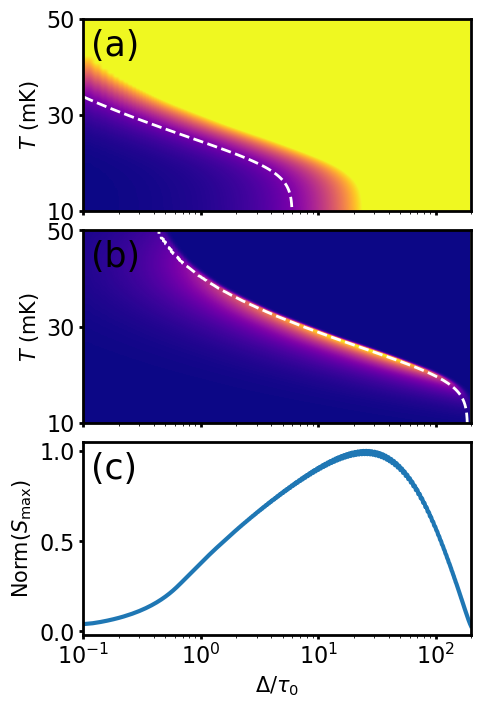

In [5]:
import numpy as np
import matplotlib.pyplot as plt

T_min, T_max = 0.010, 0.050   # 10–50 mK
nT = 200
T_vals = np.linspace(T_min, T_max, nT)

Delta_min, Delta_max = 1e-1, 200.0
nD = 10000
Delta_vals = np.linspace(Delta_min, Delta_max, nD)

TT, DD = np.meshgrid(T_vals, Delta_vals, indexing='ij')

tau_max = 6.0      # low-T correlation time
tau_min = 0.01     # high-T correlation time  (your change)
T_c     = 0.02    # 20 mK
gamma   = 8.0      # sharp crossover (your change)

r = (TT / T_c)**gamma
tau_c = (tau_max + tau_min * r) / (1.0 + r)

# Normalized memory kernel to drop off n_a(T)
K_norm = np.exp(-DD / tau_c)

# Log-scaled kernel
eps = 1e-15
K_log = -np.log(K_norm + eps)
K_log_clipped = np.clip(K_log, 0.0, 4.0)

# Raw T-derivative of ln K
dKnorm_dT   = np.gradient(K_norm, T_vals, axis=0)
dlnKnorm_dT = dKnorm_dT / (K_norm + eps)

S = np.abs(dlnKnorm_dT)
S_max = np.max(S)
S_norm = S / (S_max + 1e-30)

# Ridge (same as argmax of S)
ridge_indices = np.argmax(S, axis=1)
Delta_ridge   = Delta_vals[ridge_indices]

# ------------------------------------------------------------
# Figure with three panels
# ------------------------------------------------------------
fig, ax = plt.subplots(3, 1, figsize=(5, 8), sharex=True, gridspec_kw={'hspace': 0.1})

# (a) -ln K̃
# ax = axes[0]
im0 = ax[0].imshow(
    K_log_clipped,
    origin='lower',
    aspect='auto',
    extent=[Delta_min, Delta_max, T_min*1e3, T_max*1e3],
    cmap='plasma',
)
# cbar0 = plt.colorbar(im0, ax=ax[0], pad=0.01)
# cbar0.set_ticks([0.0, 2.0, 4.0])
# cbar0.set_label(r'$-\ln \tilde{\mathcal{K}}(T,\Delta)$', fontsize=12)

cs = ax[0].contour(
    Delta_vals, T_vals*1e3, K_log,
    levels=[1.0],
    colors='w',
    linewidths=2.0,
    linestyles='--'
)
# ax.clabel(cs, fmt={1.0: r'$\tilde{\mathcal{K}}=e^{-1}$'}, fontsize=10)
ax[0].set_xscale('log')
ax[0].set_ylabel(r'$T$ (mK)', fontsize=15)
ax[0].set_yticks(np.linspace(T_min*1e3, T_max*1e3, 3))

# (b) normalized sensitivity with ridge
# ax = axes[1]
im1 = ax[1].imshow(
    S_norm,
    origin='lower',
    aspect='auto',
    extent=[Delta_min, Delta_max, T_min*1e3, T_max*1e3],
    vmin=0, vmax=1,
    cmap='plasma'
)
# cbar1 = plt.colorbar(im1, ax=ax[1], pad=0.01)
# cbar1.set_ticks([0.0, 0.5, 1.0])
# cbar1.set_label(r'Norm($S(T,\Delta)$)', fontsize=12)
ax[1].plot(Delta_ridge, T_vals*1e3, color='w', lw=2.0, ls='--')
ax[1].set_xscale('log')
ax[1].set_yticks(np.linspace(T_min*1e3, T_max*1e3, 3))
ax[1].set_ylabel(r'$T$ (mK)', fontsize=15)
# ax[1].legend(frameon=False, loc='upper right')
# (c) linecuts of normalized sensitivity vs T
smax = np.abs(S_norm)
S_max_vs_Delta = smax.max(axis=0)

from scipy.ndimage import gaussian_filter1d
S_smooth = gaussian_filter1d(S_max_vs_Delta, sigma=1.0)
# ax = axes[2]
ax[2].semilogx(Delta_vals, S_smooth, lw=3)
ax[2].set_yticks([0.0, 0.5, 1.0])
ax[2].set_xlabel(r'$\Delta / \tau_0$', fontsize=15)
ax[2].set_ylabel(r'Norm($S_{\max}$)', fontsize=15)

labels = ['(a)', '(b)', '(c)'] 
line_width = 2.0  # Desired line thickness (adjust as needed)
for i, ax in enumerate(fig.get_axes()): # Iterate through all Axes objects in the figure
    for spine in ax.spines.values():
        spine.set_linewidth(line_width)
    ax.tick_params(width=line_width)
    ax.text(0.02, 0.95, labels[i], transform=ax.transAxes,
            fontsize=25, fontweight='normal', va='top', ha='left')
    
    ax.tick_params(axis='both',  direction='out', labelsize=16, length=3.0)
    for tick_label in ax.get_xticklabels():
        tick_label.set_fontweight('normal')
    for tick_label in ax.get_yticklabels():
        tick_label.set_fontweight('normal')

plt.tight_layout()
plt.show()


# Figure 2

C:\Users\sjzhu\AppData\Local\Temp\ipykernel_14184\3989416359.py:181: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


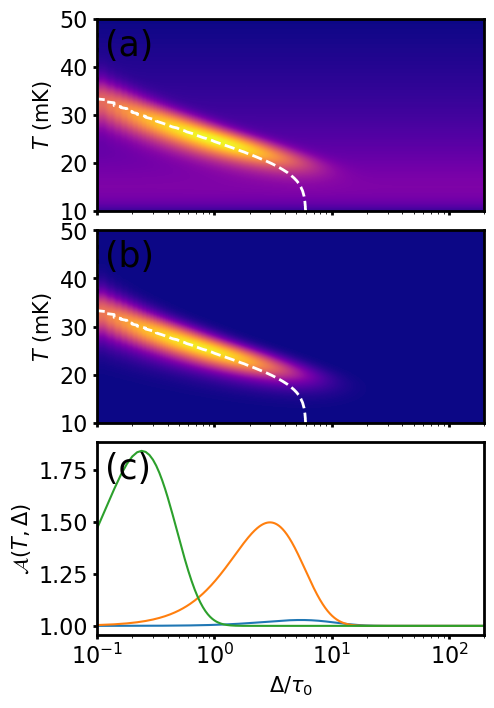

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Plot style
# ------------------------------------------------------------
plt.rcParams['figure.figsize'] = (3.4, 5.0)
plt.rcParams['font.size'] = 9
plt.rcParams['axes.linewidth'] = 0.7
plt.rcParams['xtick.major.width'] = 0.6
plt.rcParams['ytick.major.width'] = 0.6

# ------------------------------------------------------------
# Physical scales for absorber mode (for F1(T))
# ------------------------------------------------------------
hbar = 1.054_571_817e-34
kB   = 1.380_649e-23
omega_a = 2 * np.pi * 1.0e9   # 1 GHz absorber
Theta   = hbar * omega_a / kB # ~0.048 K

# ------------------------------------------------------------
# Temperature and delay grids (same as Fig. 1)
# ------------------------------------------------------------
T_min, T_max = 0.010, 0.050   # 10–50 mK
nT = 200
T_vals = np.linspace(T_min, T_max, nT)  # K

Delta_min, Delta_max = 1e-1, 200.0        # Δ/τ0 in [0,5]
nD = 10000
Delta_vals = np.linspace(Delta_min, Delta_max, nD)

T_grid, D_grid = np.meshgrid(T_vals, Delta_vals, indexing='ij')

# ------------------------------------------------------------
# Thermal occupation and variance (for single-tooth F1)
# ------------------------------------------------------------
def n_th(T):
    x = Theta / T
    return 1.0 / (np.exp(x) - 1.0)

def var_n(T):
    nth = n_th(T)
    return nth * (1.0 + nth)

def dvar_n_dT(T):
    nth = n_th(T)
    Var = nth * (1.0 + nth)
    dn_dT = (Theta / T**2) * Var           # dn/dT
    return dn_dT * (1.0 + 2.0 * nth)       # dVar/dT

Var_T     = var_n(T_vals)      # (nT,)
dVar_dT_T = dvar_n_dT(T_vals)  # (nT,)

# ------------------------------------------------------------
# Single-tooth dephasing QFI F1(T) (pure dephasing model)
# ------------------------------------------------------------
g = 0.05                         # dimensionless (λ τ0)^2

Gamma1_T   = g * Var_T           # dephasing exponent
C1_T       = np.exp(-Gamma1_T)   # coherence
dGamma1_dT = g * dVar_dT_T
dC1_dT     = -C1_T * dGamma1_dT

eps = 1e-14
F1_single = (dC1_dT**2) / (1.0 - C1_T**2 + eps)
F_ind     = 2.0 * F1_single      # two independent teeth

# ------------------------------------------------------------
# Correlation time τ_c(T) — SAME MODEL AS FIG. 1
# ------------------------------------------------------------
tau_max = 6.0    # low-T correlation time in units of τ0
tau_min = 0.01   # high-T correlation time
T_c     = 0.020  # 20 mK crossover
gamma   = 8.0    # sharp crossover

r        = (T_vals / T_c)**gamma
tau_c_T  = (tau_max + tau_min * r) / (1.0 + r)   # (nT,)
dr_dT    = gamma * (T_vals**(gamma - 1)) / (T_c**gamma)
dtau_dT  = ((tau_min - tau_max) * dr_dT) / (1.0 + r)**2   # (nT,)

Tau      = tau_c_T[:, None]                      # (nT,1)
dTau_dT  = dtau_dT[:, None]                      # (nT,1)
Delta    = Delta_vals[None, :]                   # (1,nD)

# Normalized memory kernel
tildeK   = np.exp(-Delta / Tau)                  # (nT,nD)

# ∂_T ln tildeK = Δ * (dτ_c/dT) / τ_c^2
dlnK_dT  = Delta * dTau_dT / (Tau**2)            # (nT,nD)

# Correlation-sensitivity factor D(T,Δ) = tildeK * ∂_T ln tildeK
D        = tildeK * dlnK_dT
D_abs    = np.abs(D)
D_norm   = D_abs / (D_abs.max() + 1e-30)         # in [0,1]

# ------------------------------------------------------------
# Phenomenological memory term and two-tooth QFI
#   F2(T,Δ) = F_ind(T) + F_mem(T,Δ)
#   F_mem ∝ |tildeK ∂_T ln tildeK|^2
# ------------------------------------------------------------
A0      = F_ind.mean()          # sets the overall strength of memory term
F_mem   = A0 * (D_norm**2)      # (nT,nD)

F2      = F_ind[:, None] + F_mem          # two-tooth QFI
A_mem   = F2 / (F_ind[:, None] + eps)     # memory advantage 𝒜

# ------------------------------------------------------------
# Figure: (a) F2, (b) 𝒜, (c) linecuts of 𝒜 vs Δ
# ------------------------------------------------------------
fig, axes = plt.subplots(3, 1, figsize=(5, 8), sharex=True, gridspec_kw={'hspace': 0.1})

# (a) Two-tooth QFI
ax = axes[0]
ridge_indices = np.argmax(F2, axis=1)
Delta_ridge   = Delta_vals[ridge_indices]
im0 = ax.imshow(
    F2,
    origin='lower',
    aspect='auto',
    extent=[Delta_min, Delta_max, T_min*1e3, T_max*1e3],
    cmap='plasma'
)
# cbar0 = plt.colorbar(im0, ax=ax)
# cbar0.set_label(r'$\mathcal{F}_2(T,\Delta)$')
ax.plot(Delta_ridge, T_vals*1e3, color='w', lw=2.0, ls='--')
ax.set_xscale('log')
ax.set_ylabel(r'$T$ (mK)', fontsize=15)
# ax.set_title(r'(a) Two-tooth QFI $\mathcal{F}_2(T,\Delta)$')

# (b) Memory advantage
ax = axes[1]
A_plot = np.clip(A_mem, 1.0, 2.0)  # focus on region with 1 ≤ 𝒜 ≤ 2
ridge_indices = np.argmax(A_plot, axis=1)
Delta_ridge   = Delta_vals[ridge_indices]
im1 = ax.imshow(
    A_plot,
    origin='lower',
    aspect='auto',
    extent=[Delta_min, Delta_max, T_min*1e3, T_max*1e3],
    vmin=1.0, vmax=2.0,
    cmap='plasma'
)
# cbar1 = plt.colorbar(im1, ax=ax)
# cbar1.set_label(r'$\mathcal{A}(T,\Delta) = \mathcal{F}_2 / [2\mathcal{F}_1]$')
ax.plot(Delta_ridge, T_vals*1e3, color='w', lw=2.0, ls='--')
ax.set_xscale('log')
ax.set_ylabel(r'$T$ (mK)', fontsize=15)
# ax.set_title(r'(b) Memory advantage $\mathcal{A}(T,\Delta)$')

# (c) Linecuts of 𝒜 vs Δ for a few temperatures
ax = axes[2]
T_line_vals = [0.015, 0.020, 0.030]  # 12, 20, 30, 40 mK
for T0 in T_line_vals:
    idx = np.argmin(np.abs(T_vals - T0))
    ax.semilogx(
        Delta_vals,
        A_mem[idx, :],
        label=rf'$T={T_vals[idx]*1e3:.0f}\,\mathrm{{mK}}$'
    )

# ax.axhline(1.0, color='k', linestyle=':', linewidth=0.7)  # 𝒜=1 reference
ax.set_xlabel(r'$\Delta / \tau_0$', fontsize=15)
ax.set_ylabel(r'$\mathcal{A}(T,\Delta)$', fontsize=15)
# ax.set_title(r'(c) Memory advantage linecuts')
# ax.legend(frameon=False, fontsize=7)

labels = ['(a)', '(b)', '(c)'] 
line_width = 2.0  # Desired line thickness (adjust as needed)
for i, ax in enumerate(fig.get_axes()): # Iterate through all Axes objects in the figure
    for spine in ax.spines.values():
        spine.set_linewidth(line_width)
    ax.tick_params(width=line_width)
    ax.text(0.02, 0.95, labels[i], transform=ax.transAxes,
            fontsize=25, fontweight='normal', va='top', ha='left')
    
    ax.tick_params(axis='both',  direction='out', labelsize=16, length=3.0)
    for tick_label in ax.get_xticklabels():
        tick_label.set_fontweight('normal')
    for tick_label in ax.get_yticklabels():
        tick_label.set_fontweight('normal')
plt.tight_layout()
plt.show()


# Figure 3

C:\Users\sjzhu\AppData\Local\Temp\ipykernel_14184\3819798925.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


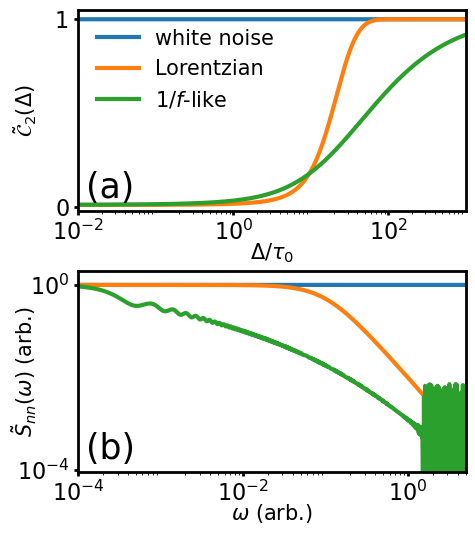

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# PRL-like plotting style
# ------------------------------------------------------------
# plt.rcParams['figure.figsize'] = (3.4, 2.6)   # single-column
# plt.rcParams['font.size'] = 9
# plt.rcParams['axes.linewidth'] = 0.6
# plt.rcParams['xtick.major.width'] = 0.5
# plt.rcParams['ytick.major.width'] = 0.5

# ------------------------------------------------------------
# Parameters for coherence (dimensionless units)
# ------------------------------------------------------------
lam = 0.5        # effective cross-Kerr rate
tau1 = 3.0        # interaction times
tau2 = 3.0
var_n = 1.0       # population variance

base = lam**2 * (tau1**2 + tau2**2) * var_n          # single-tooth part
corr_scale = 2 * lam**2 * tau1 * tau2 * var_n        # correlated part

Delta = np.geomspace(0.001, 10000, 40000)   # delay axis
# Delta = np.linspace(0.01, 10000, 40000)   # delay axis

# ------------------------------------------------------------
# Define three example kernels K(Δ)
# ------------------------------------------------------------
# White noise: nearly delta-correlated -> super-fast decay
sigma_w = 0.001
K_white = np.exp(-(Delta / sigma_w)**2)

# Lorentzian noise: exponential correlation decay
tau_c = 10
K_lor = np.exp(-Delta / tau_c)

# 1/f-like noise: slow, heavy-tailed correlations (phenomenological)
tau_f = 5e0
gamma = 0.7  # <1 for heavy tail
K_1f = 1.0 / (1.0 + (Delta / tau_f)**gamma)

# Normalize kernels so K(0) = Var[n] = 1 (we absorb Var into base/corr_scale)
K_white /= K_white[0]
K_lor   /= K_lor[0]
K_1f    /= K_1f[0]
K_mix = (K_lor + K_1f)/2

# ------------------------------------------------------------
# Coherence C2(Δ) using Eq. (two-tooth coherence)
# C2(Δ) = exp[- base - corr_scale * K(Δ)]
# (Var[n] absorbed into base and corr_scale.)
# ------------------------------------------------------------
C2_white = np.exp(-(base + corr_scale * K_white))
C2_lor   = np.exp(-(base + corr_scale * K_lor))
C2_1f    = np.exp(-(base + corr_scale * K_1f))
C2_mix    = np.exp(-(base + corr_scale * K_mix))

# ------------------------------------------------------------
# Normalize by asymptotic value C2(Δ -> ∞) so max visibility = 1
# ------------------------------------------------------------
C2_inf_white = C2_white[-1]
C2_inf_lor   = C2_lor[-1]
C2_inf_1f    = C2_1f[-1]
C2_inf_mix    = C2_mix[-1]

C2_white_norm = C2_white / C2_inf_white
C2_lor_norm   = C2_lor   / C2_inf_lor
C2_1f_norm    = C2_1f    / C2_inf_1f
C2_mix_norm    = C2_mix    / C2_inf_mix

fig, ax = plt.subplots(2, 1, figsize=(5, 6), sharex=False, gridspec_kw={'hspace': 0.3})

ax[0].semilogx(Delta, C2_white_norm, label='white noise', lw=3)
ax[0].semilogx(Delta, C2_lor_norm,   label='Lorentzian', lw=3)
ax[0].semilogx(Delta, C2_1f_norm,    label=r'$1/f$-like', lw=3)
# ax[0].semilogx(Delta, C2_mix_norm,   label=r'$1/f$+Lorentzian', linestyle='--', lw=2)

ax[0].set_xlabel(r'$\Delta / \tau_0$', fontsize=15)
ax[0].xaxis.set_label_coords(0.5, -0.15)
ax[0].set_ylabel(r'$\tilde{\mathcal{C}}_2(\Delta)$', fontsize=15)
ax[0].yaxis.set_label_coords(-0.1, 0.5)
ax[0].set_xlim(0.01, 1000)
ax[0].set_xticks([0.01, 1, 100])
ax[0].set_ylim(-0.02, 1.05)   # adjust as you like; all ≤ 1
ax[0].set_yticks([0.0, 1.0])
ax[0].legend(frameon=False, fontsize=15)

def reconstruct_kernel(C2_raw, base, corr_scale):
    return (-np.log(C2_raw) - base) / corr_scale

K_white_rec = reconstruct_kernel(C2_white, base, corr_scale)
K_lor_rec   = reconstruct_kernel(C2_lor,   base, corr_scale)
K_1f_rec    = reconstruct_kernel(C2_1f,    base, corr_scale)
# K_mix_rec    = reconstruct_kernel(C2_mix,    base, corr_scale)

omega = np.logspace(-5, 2, 1500)   # frequency axis
def spectrum_from_kernel(K, Delta, omega):
    S = np.zeros_like(omega)
    for i, w in enumerate(omega):
        S[i] = 2 * np.trapz(K * np.cos(w * Delta), Delta)
    return S

S_white_rec = spectrum_from_kernel(K_white_rec, Delta, omega)
S_lor_rec   = spectrum_from_kernel(K_lor_rec,   Delta, omega)
S_1f_rec    = spectrum_from_kernel(K_1f_rec,    Delta, omega)
# S_mix_rec    = spectrum_from_kernel(K_mix_rec,    Delta, omega)

ax[1].loglog(omega, S_white_rec/np.max(S_white_rec), label="white (rec.)", lw=3)
ax[1].loglog(omega, S_lor_rec/np.max(S_lor_rec),     label="Lorentzian (rec.)", lw=3)
ax[1].loglog(omega, S_1f_rec/np.max(S_1f_rec),       label="1/f-like (rec.)", lw=3)
# ax[1].loglog(omega, S_mix_rec/np.max(S_mix_rec), linestyle='--', lw=2)

ax[1].set_xlim(1e-4, 5e0)
ax[1].set_ylim(9e-5, 2)
ax[1].set_xticks([1e-4, 1e-2, 1e-0])
ax[1].set_yticks([1e-4, 1e0])
ax[1].set_xlabel(r'$\omega$ (arb.)', fontsize=15)
ax[1].xaxis.set_label_coords(0.5, -0.15)
ax[1].yaxis.set_label_coords(-0.1, 0.5)
ax[1].set_ylabel(r'$\tilde{S}_{nn}(\omega)$ (arb.)', fontsize=15)
# ax[1].legend(frameon=False, fontsize=20)


plt.tight_layout()
labels = ['(a)', '(b)'] 
line_width = 2.0  # Desired line thickness (adjust as needed)
for i, ax in enumerate(fig.get_axes()): # Iterate through all Axes objects in the figure
    for spine in ax.spines.values():
        spine.set_linewidth(line_width)
    ax.tick_params(width=line_width)
    ax.text(0.02, 0.20, labels[i], transform=ax.transAxes,
            fontsize=25, fontweight='normal', va='top', ha='left')
    
    ax.tick_params(axis='both',  direction='out', labelsize=16, length=3.0)
    for tick_label in ax.get_xticklabels():
        tick_label.set_fontweight('normal')
    for tick_label in ax.get_yticklabels():
        tick_label.set_fontweight('normal')
plt.show()


# Figure: Combination of Fig 1 and 2

C:\Users\sjzhu\AppData\Local\Temp\ipykernel_14184\3069367120.py:235: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


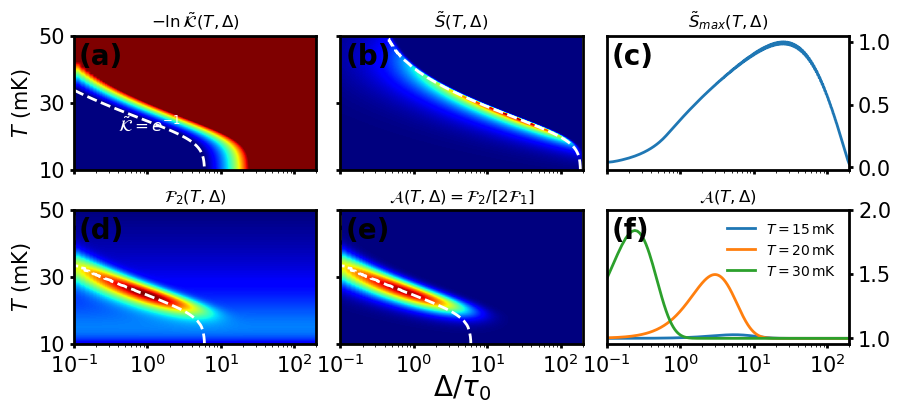

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

T_min, T_max = 0.010, 0.050   # 10–50 mK
nT = 200
T_vals = np.linspace(T_min, T_max, nT)

Delta_min, Delta_max = 1e-1, 200.0
nD = 10000
Delta_vals = np.linspace(Delta_min, Delta_max, nD)

TT, DD = np.meshgrid(T_vals, Delta_vals, indexing='ij')

tau_max = 6.0      # low-T correlation time
tau_min = 0.01     # high-T correlation time  (your change)
T_c     = 0.02    # 20 mK
gamma   = 8.0      # sharp crossover (your change)

r = (TT / T_c)**gamma
tau_c = (tau_max + tau_min * r) / (1.0 + r)
K_norm = np.exp(-DD / tau_c)

eps = 1e-15
K_log = -np.log(K_norm + eps)
K_log_clipped = np.clip(K_log, 0.0, 4.0)

dKnorm_dT   = np.gradient(K_norm, T_vals, axis=0)
dlnKnorm_dT = dKnorm_dT / (K_norm + eps)

S = np.abs(dlnKnorm_dT)
S_max = np.max(S)
S_norm = S / (S_max + 1e-30)

ridge_indices = np.argmax(S, axis=1)
Delta_ridge   = Delta_vals[ridge_indices]

hbar = 1.054_571_817e-34
kB   = 1.380_649e-23
omega_a = 2 * np.pi * 1.0e9   # 1 GHz absorber
Theta   = hbar * omega_a / kB # ~0.048 K

def n_th(T):
    x = Theta / T
    return 1.0 / (np.exp(x) - 1.0)

def var_n(T):
    nth = n_th(T)
    return nth * (1.0 + nth)

def dvar_n_dT(T):
    nth = n_th(T)
    Var = nth * (1.0 + nth)
    dn_dT = (Theta / T**2) * Var           # dn/dT
    return dn_dT * (1.0 + 2.0 * nth)       # dVar/dT

Var_T     = var_n(T_vals)      # (nT,)
dVar_dT_T = dvar_n_dT(T_vals)  # (nT,)

g = 0.05                         # dimensionless (λ τ0)^2

Gamma1_T   = g * Var_T           # dephasing exponent
C1_T       = np.exp(-Gamma1_T)   # coherence
dGamma1_dT = g * dVar_dT_T
dC1_dT     = -C1_T * dGamma1_dT

eps = 1e-14
F1_single = (dC1_dT**2) / (1.0 - C1_T**2 + eps)
F_ind     = 2.0 * F1_single      # two independent teeth

# ------------------------------------------------------------
# Correlation time τ_c(T) — SAME MODEL AS FIG. 1
# ------------------------------------------------------------
# tau_max = 6.0    # low-T correlation time in units of τ0
# tau_min = 0.01   # high-T correlation time
# T_c     = 0.020  # 20 mK crossover
# gamma   = 8.0    # sharp crossover

r        = (T_vals / T_c)**gamma
tau_c_T  = (tau_max + tau_min * r) / (1.0 + r)   # (nT,)
dr_dT    = gamma * (T_vals**(gamma - 1)) / (T_c**gamma)
dtau_dT  = ((tau_min - tau_max) * dr_dT) / (1.0 + r)**2   # (nT,)

Tau      = tau_c_T[:, None]                      # (nT,1)
dTau_dT  = dtau_dT[:, None]                      # (nT,1)
Delta    = Delta_vals[None, :]                   # (1,nD)

# Normalized memory kernel
tildeK   = np.exp(-Delta / Tau)                  # (nT,nD)

# ∂_T ln tildeK = Δ * (dτ_c/dT) / τ_c^2
dlnK_dT  = Delta * dTau_dT / (Tau**2)            # (nT,nD)

# Correlation-sensitivity factor D(T,Δ) = tildeK * ∂_T ln tildeK
D        = tildeK * dlnK_dT
D_abs    = np.abs(D)
D_norm   = D_abs / (D_abs.max() + 1e-30)         # in [0,1]

# ------------------------------------------------------------
# Phenomenological memory term and two-tooth QFI
#   F2(T,Δ) = F_ind(T) + F_mem(T,Δ)
#   F_mem ∝ |tildeK ∂_T ln tildeK|^2
# ------------------------------------------------------------
A0      = F_ind.mean()          # sets the overall strength of memory term
F_mem   = A0 * (D_norm**2)      # (nT,nD)

F2      = F_ind[:, None] + F_mem          # two-tooth QFI
A_mem   = F2 / (F_ind[:, None] + eps)     # memory advantage 𝒜

fig, ax = plt.subplots(2, 3, figsize=(10, 4), sharex=True, gridspec_kw={'wspace':0.1, 'hspace': 0.3})

# (a) -ln K̃
# ax = axes[0]
im0 = ax[0, 0].imshow(K_log_clipped, origin='lower', aspect='auto', extent=[Delta_min, Delta_max, T_min*1e3, T_max*1e3], vmin=1, vmax=4, cmap='jet',)
# cax = inset_axes(ax[0,0], width="80%", height="40%", loc='upper center', bbox_to_anchor=(0, 0.98, 1.0, 0.1), bbox_transform=ax[0,0].transAxes, borderpad=0)
# cb = fig.colorbar(im0, cax=cax, orientation='horizontal', ticks=([1, 4]))
# cb.ax.xaxis.set_ticks_position('top')
# cb.set_label(r'$-\ln \tilde{\mathcal{K}}(T,\Delta)$', fontsize=12, labelpad=-20.0)
cs = ax[0,0].contour(Delta_vals, T_vals*1e3, K_log, levels=[1.0], colors='w', linewidths=2.0, linestyles='--')
# labels = ax[0,0].clabel(cs, fmt={1.0: r'$\tilde{\mathcal{K}}=e^{-1}$'}, fontsize=10)
# if labels:
#     # Example: Move the first label slightly to the right and down
#     current_pos = labels[0].get_position()
#     new_x = current_pos[0] - 2.5
#     new_y = current_pos[1] + 1.5
#     labels[0].set_position((new_x, new_y))
ax[0,0].text(0.4, 21.6, r'$\tilde{\mathcal{K}}=e^{-1}$', c='w', fontsize=12)
ax[0,0].set_xscale('log')
ax[0,0].set_xticks([])
ax[0,0].set_ylabel(r'$T$ (mK)', fontsize=15)
ax[0,0].set_yticks(np.linspace(T_min*1e3, T_max*1e3, 3))
ax[0,0].set_title(r'$-\ln \tilde{\mathcal{K}}(T,\Delta)$', fontsize=12)

# ax_mid_top = ax[0, 1]
# pos = ax_mid_top.get_position()  # [x0, y0, width, height]
# shift = 0.03  # how far to move left (in figure fraction)
# ax_mid_top.set_position([pos.x0 - shift, pos.y0, pos.width, pos.height])

im1 = ax[0,1].imshow(S_norm, origin='lower', aspect='auto', extent=[Delta_min, Delta_max, T_min*1e3, T_max*1e3], vmin=0, vmax=1, cmap='jet')
# cax = inset_axes(ax[0,1], width="80%", height="40%", loc='upper center', bbox_to_anchor=(1.1, 0.98, 1.0, 0.1), bbox_transform=ax[0,0].transAxes, borderpad=0)
# cb = fig.colorbar(im1, cax=cax, orientation='horizontal', ticks=([0, 1]))
# cb.ax.xaxis.set_ticks_position('top')
# cb.set_label(r'Norm($S(T,\Delta)$)', fontsize=12, labelpad=-20.0)
ax[0,1].plot(Delta_ridge, T_vals*1e3, color='w', lw=2.0, ls='--')
ax[0,1].set_xscale('log')
ax[0,1].set_xticks([])
ax[0,1].set_yticks([10, 30, 50])
ax[0,1].set_yticklabels([])
ax[0,1].set_title(r'$\tilde{S}(T,\Delta)$', fontsize=12)

smax = np.abs(S_norm)
S_max_vs_Delta = smax.max(axis=0)
from scipy.ndimage import gaussian_filter1d
S_smooth = gaussian_filter1d(S_max_vs_Delta, sigma=1.0)
ax[0,2].yaxis.set_ticks_position('right')
ax[0,2].yaxis.set_label_position('right')
ax[0,2].semilogx(Delta_vals, S_smooth, lw=2)
ax[0,2].set_xticks([])
ax[0,2].set_yticks([0.0, 0.5, 1.0])
# ax[0,2].set_ylabel(r'Norm($S_{\max}$)', fontsize=12)
ax[0,2].set_title(r'$\tilde{S}_{max}(T,\Delta)$', fontsize=12)

ridge_indices = np.argmax(F2, axis=1)
Delta_ridge   = Delta_vals[ridge_indices]
im0 = ax[1,0].imshow(
    F2,
    origin='lower',
    aspect='auto',
    extent=[Delta_min, Delta_max, T_min*1e3, T_max*1e3],
    cmap='jet'
)
# cax = inset_axes(ax[0,0], width="80%", height="40%", loc='upper center', bbox_to_anchor=(0, -0.42, 1.0, 0.1), bbox_transform=ax[0,0].transAxes, borderpad=0)
# cb = fig.colorbar(im0, cax=cax, orientation='horizontal', ticks=[100, 200])
# cb.ax.xaxis.set_ticks_position('top')
# cb.set_label(r'$\mathcal{F}_2(T,\Delta)$', labelpad=-20.0, fontsize=12)
ax[1,0].plot(Delta_ridge, T_vals*1e3, color='w', lw=2.0, ls='--')
ax[1,0].set_xscale('log')
ax[1,0].set_yticks([10,30,50])
ax[1,0].set_ylabel(r'$T$ (mK)', fontsize=15)
ax[1,0].set_title(r'$\mathcal{F}_2(T,\Delta)$', fontsize=12)

A_plot = np.clip(A_mem, 1.0, 2.0)  # focus on region with 1 ≤ 𝒜 ≤ 2
ridge_indices = np.argmax(A_plot, axis=1)
Delta_ridge   = Delta_vals[ridge_indices]
im1 = ax[1,1].imshow(
    A_plot,
    origin='lower',
    aspect='auto',
    extent=[Delta_min, Delta_max, T_min*1e3, T_max*1e3],
    vmin=1.0, vmax=2.0,
    cmap='jet'
)
# cax = inset_axes(ax[1,1], width="80%", height="40%", loc='upper center', bbox_to_anchor=(1.1, -0.42, 1.0, 0.1), bbox_transform=ax[0,0].transAxes, borderpad=0)
# cb = fig.colorbar(im1, cax=cax, orientation='horizontal', ticks=([1, 2]))
# cb.ax.xaxis.set_ticks_position('top')
# cb.set_label(r'$\mathcal{A}(T,\Delta) = \mathcal{F}_2 / [2\mathcal{F}_1]$', labelpad=-20.0, fontsize=12)
ax[1,1].plot(Delta_ridge, T_vals*1e3, color='w', lw=2.0, ls='--')
ax[1,1].set_xlabel(r'$\Delta / \tau_0$', fontsize=20)
ax[1,1].set_xscale('log')
ax[1,1].xaxis.set_label_coords(0.5, -0.22)
ax[1,1].set_yticks([10, 30, 50])
ax[1,1].set_yticklabels([])
ax[1,1].set_title(r'$\mathcal{A}(T,\Delta) = \mathcal{F}_2 / [2\mathcal{F}_1]$', fontsize=12)

ax[1,2].yaxis.set_ticks_position('right')
ax[1,2].yaxis.set_label_position('right')
T_line_vals = [0.015, 0.020, 0.030]  # 12, 20, 30, 40 mK
for T0 in T_line_vals:
    idx = np.argmin(np.abs(T_vals - T0))
    ax[1,2].semilogx(
        Delta_vals, 
        A_mem[idx, :],
        lw=2,
        label=rf'$T={T_vals[idx]*1e3:.0f}\,\mathrm{{mK}}$'
    )
ax[1,2].set_yticks([1.0,1.5,2.0])
# ax[1,2].set_ylabel(r'$\mathcal{A}(T,\Delta)$', fontsize=12)
ax[1,2].set_title(r'$\mathcal{A}(T,\Delta)$', fontsize=12)
ax[1,2].legend(frameon=False, fontsize=10)

labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)'] 
line_width = 2.0  # Desired line thickness (adjust as needed)
for i, ax in enumerate(fig.get_axes()): # Iterate through all Axes objects in the figure
    for spine in ax.spines.values():
        spine.set_linewidth(line_width)
    ax.tick_params(width=line_width)
    ax.text(0.02, 0.95, labels[i], transform=ax.transAxes, color='k',
            fontsize=20, fontweight='bold', va='top', ha='left')
    
    ax.tick_params(axis='both',  direction='out', labelsize=15, length=3.0)
    for tick_label in ax.get_xticklabels():
        tick_label.set_fontweight('normal')
    for tick_label in ax.get_yticklabels():
        tick_label.set_fontweight('normal')
plt.tight_layout()
plt.show()
